# CSE454 Data Mining Project
The goal of this data mining project is to analyze the *2022 Data File* of the ***Behavioral Risk Factor Surveillance System*** (BRFSS) to identify potential risk factors associated with individuals who have experienced a heart attack.

https://www.cdc.gov/brfss/annual_data/annual_2022.html



# PREPROCESSING
The preprocessing phase is a crucial step in preparing the raw data for analysis. This involves cleaning, transforming, and organizing the data to ensure its quality and suitability for model training.

##Converting file type

Data file converted to more usable file type.

In [17]:
import numpy as np

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


%matplotlib inline

## For statistical test
from scipy.stats import chisquare, chi2_contingency ## Stastical test
from scipy.stats import probplot
from scipy import stats
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2



from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [19]:
dataset = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/LLCP2022.csv")
dataset.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_SMOKGRP,_LCSREC,DRNKANY6,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4
0,1.0,1.0,2032022,2,3,2022,1100.0,2022000001,2.022000e+09,1.0,...,4.0,NaN,2.0,0.0,1.0,0.0,1.0,1.0,2.0,2.0
1,1.0,1.0,2042022,2,4,2022,1100.0,2022000002,2.022000e+09,1.0,...,4.0,NaN,2.0,0.0,1.0,0.0,1.0,2.0,2.0,2.0
2,1.0,1.0,2022022,2,2,2022,1100.0,2022000003,2.022000e+09,1.0,...,4.0,NaN,2.0,0.0,1.0,0.0,1.0,NaN,NaN,2.0
3,1.0,1.0,2032022,2,3,2022,1100.0,2022000004,2.022000e+09,1.0,...,3.0,2.0,2.0,0.0,1.0,0.0,1.0,9.0,9.0,2.0
4,1.0,1.0,2022022,2,2,2022,1100.0,2022000005,2.022000e+09,1.0,...,4.0,NaN,1.0,10.0,1.0,140.0,1.0,NaN,NaN,2.0


In [20]:
dataset.shape

(445132, 328)

##Feature Selection

Identified and selected relevant features that are likely to contribute significantly to the prediction of heart attacks. This may include factors such as age, gender, smoking status, physical activity, diabet, and heart diseases.














Selected Features

1. SEXVAR male or female
2. _AGEG5YR age
3. _BMI5 bmi
4. EDUCA education
5. INCOME3
6. EXERANY2 Exercise in Past 30 Days
7. _SMOKGRP
8. _RFDRHV8 Heavy Alcohol Consumption  Calculated Variable
9. DIFFWALK difficulty walking or climbing stairs
10. GENHLTH General Health
11. PHYSHLTH days physical health
12. MENTHLTH days mental health
13. ADDEPEV3 you had a depressive disorder
14. ASTHMA3 Ever Told Had Asthma
15. CHCSCNC1 melonoma
16. CVDCRHD4 Ever Diagnosed with Angina or Coronary Heart Disease
17. CVDSTRK3 Ever Diagnosed with a Stroke
18. DIABETE4
19. COVIDPOS Have you ever covid positive
20. CVDINFR4 **Heart Attack**

In [21]:
dataset = dataset[['SEXVAR', '_AGEG5YR', '_BMI5', 'EDUCA', 'INCOME3',
              'EXERANY2', '_SMOKGRP', '_RFDRHV8', 'DIFFWALK',
              'GENHLTH', 'PHYSHLTH', 'MENTHLTH','ADDEPEV3',
              'ASTHMA3', 'CHCSCNC1', 'CVDCRHD4', 'CVDSTRK3', 'DIABETE4', 'COVIDPOS',
             'CVDINFR4'
                ]]

In [22]:
dataset.head()

,SEXVAR,_AGEG5YR,_BMI5,EDUCA,INCOME3,EXERANY2,_SMOKGRP,_RFDRHV8,DIFFWALK,GENHLTH,PHYSHLTH,MENTHLTH,ADDEPEV3,ASTHMA3,CHCSCNC1,CVDCRHD4,CVDSTRK3,DIABETE4,COVIDPOS,CVDINFR4
0,2.0,13.0,NaN,6.0,99.0,2.0,4.0,1.0,2.0,2.0,88.0,88.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0
1,2.0,13.0,2657.0,4.0,5.0,2.0,4.0,1.0,2.0,1.0,88.0,88.0,2.0,2.0,1.0,2.0,2.0,3.0,2.0,2.0
2,2.0,8.0,2561.0,6.0,10.0,1.0,4.0,1.0,2.0,2.0,2.0,3.0,2.0,2.0,1.0,2.0,2.0,3.0,1.0,2.0
3,2.0,14.0,2330.0,4.0,77.0,1.0,3.0,1.0,2.0,1.0,88.0,88.0,2.0,1.0,2.0,2.0,2.0,3.0,2.0,2.0
4,2.0,5.0,2177.0,5.0,5.0,1.0,4.0,1.0,2.0,4.0,2.0,88.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0


In [23]:
dataset.shape

(445132, 20)

##Handling Missing Values
Explored the dataset for missing values and implemented strategies to handle them. This involves removing rows with missing values.


In [24]:
dataset.isna().sum()

SEXVAR          0
_AGEG5YR        0
_BMI5       48806
EDUCA           5
INCOME3     12932
EXERANY2        2
_SMOKGRP    35462
_RFDRHV8        0
DIFFWALK    22155
GENHLTH         3
PHYSHLTH        5
MENTHLTH        3
ADDEPEV3        7
ASTHMA3         2
CHCSCNC1        2
CVDCRHD4        2
CVDSTRK3        2
DIABETE4        3
COVIDPOS    49235
CVDINFR4        4
dtype: int64

In [25]:
dataset = dataset.dropna()
dataset.isna().sum()

SEXVAR      0
_AGEG5YR    0
_BMI5       0
EDUCA       0
INCOME3     0
EXERANY2    0
_SMOKGRP    0
_RFDRHV8    0
DIFFWALK    0
GENHLTH     0
PHYSHLTH    0
MENTHLTH    0
ADDEPEV3    0
ASTHMA3     0
CHCSCNC1    0
CVDCRHD4    0
CVDSTRK3    0
DIABETE4    0
COVIDPOS    0
CVDINFR4    0
dtype: int64

In [26]:
dataset.shape

(366501, 20)

##Labeling Enhancement
Improved the labeling of the target variable, which in this case is likely to be binary indicating whether an individual has experienced a heart attack or not. Ensured that the labels are clear, well-defined, and suitable for machine learning algorithms.


**SEXVAR**: Sex of Respondent

1	Male
2	Female



To make it binary male will be 0, female will be 1.

In [27]:
dataset.SEXVAR = dataset.SEXVAR.replace({1:0, 2:1})
dataset.SEXVAR.unique()

<ipython-input-27-ed7a4e901a74>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.SEXVAR = dataset.SEXVAR.replace({1:0, 2:1})


array([1., 0.])

**_AGEG5YR**: Reported age in five-year age categories calculated variable

1	18 to 24
2	25 to 29

.

.

13	80 or older

14 Don’t know/Refused/Missing


Rows with 14 will be deleted.

In [28]:
dataset = dataset[dataset._AGEG5YR != 14]
dataset._AGEG5YR.unique()

array([13.,  8.,  5., 11., 10.,  9., 12.,  7.,  6.,  4.,  3.,  2.,  1.])

**_BMI5**: Computed body mass index

bmi*100

1 - 9999




To have better corelation with feature data will convert to labeling 'overweight or obease' as if value=>2500.

In [29]:
bmidata = dataset['_BMI5'].apply(lambda x: 1 if x >= 2500 else 0)
dataset['_BMI5'] = bmidata
dataset._BMI5.unique()

array([1, 0])

**EDUCA**: Education level
1	Never attended school or only kindergarten

2	Grades 1 through 8 (Elementary)

3	Grades 9 through 11 (Some high school)

4	Grade 12 or GED (High school graduate)

5	College 1 year to 3 years (Some college or technical school)

6	College 4 years or more (College graduate)

9	Refused


Refused ones (9) will be deleted.

In [30]:
dataset = dataset[dataset.EDUCA != 9]
dataset.EDUCA.unique()

array([4., 6., 5., 3., 2., 1.])

**INCOME3**: Income Level

1	Less than 10,000

2	Less than 15,000 (10,000 to < 15,000)

3	Less than 20,000 (15,000 to < 20,000)

4	Less than 25,000 (20,000 to < 25,000)

5	Less than 35,000 (25,000 to < 35,000)

6	Less than 50,000 (35,000 to < 50,000)

7	Less than 75,000 (50,000 to < 75,000)

8	Less than 100,000 (75,000 to < 100,000)

9	Less than 150,000 (100,000 to < 150,000)

10	Less than 200,000 (150,000 to < 200,000)

11	200,000 or more

77	Don’t know/Not sure

99	Refused


Don’t know/Not sure or Refused ones (77, 99) will be deleted.

In [31]:
dataset = dataset[dataset.INCOME3 != 77]
dataset = dataset[dataset.INCOME3 != 99]
dataset.INCOME3.unique()

array([ 5., 10.,  8.,  7.,  9.,  6.,  2., 11.,  4.,  3.,  1.])

**EXERANY2**: Exercise in Past 30 Days

1	Yes

2	No

7	Don’t know/Not Sure

9	Refused

To make it binary 'No' will be 0, 'Don’t know/Not Sure'	and	'Refused' are will be deleted.

In [32]:
dataset.EXERANY2 = dataset.EXERANY2.replace({2:0})
dataset = dataset[dataset.EXERANY2 != 7]
dataset = dataset[dataset.EXERANY2 != 9]
dataset.EXERANY2.unique()

array([0., 1.])

**_SMOKGRP**: Smoking Group


1	Current smoker

2	Former smoker

3	All other current and former smokers

4	Never smoker

To make it ordinal order wıll be changed with increase of smoking cigaratte.

In [33]:
dataset._SMOKGRP = dataset._SMOKGRP.replace({4:0, 3:1, 1:3})
dataset._SMOKGRP.unique()

array([0., 1., 3., 2.])

**_RFDRHV8**: Heavy Alcohol Consumption  Calculated Variable

1	No

2	Yes

9	Don’t know/Refused/Missing

To make data binary No will be 0 Yes will be 1. Don’t know/Refused/Missing ones will be deleted

In [34]:
dataset._RFDRHV8 = dataset._RFDRHV8.replace({2:1, 1:0})
dataset = dataset[dataset._RFDRHV8 != 9]
dataset._RFDRHV8.unique()

array([0., 1.])

**DIFFWALK**: Difficulty Walking or Climbing Stairs

1	Yes

2	No

7	Don’t know/Not Sure

9	Refused

To make it binary 'No' will be 0, 'Don’t know/Not Sure'	and	'Refused' are will be deleted.

In [35]:
dataset.DIFFWALK = dataset.DIFFWALK.replace({2:0})
dataset = dataset[dataset.DIFFWALK != 7]
dataset = dataset[dataset.DIFFWALK != 9]
dataset.DIFFWALK.unique()

array([0., 1.])

**GENHLTH**: General Health


1	Excellent

2	Very good

3	Good

4	Fair

5	Poor

7	Don’t know/Not Sure

9	Refused


To make it ordinal order wıll be changed with increase of general health. Don’t know/Not Sure and	Refused ones will be deleted


In [36]:
dataset.GENHLTH = dataset.GENHLTH.replace({5:1, 4:2, 2:4, 1:5})
dataset = dataset[dataset.GENHLTH != 7]
dataset = dataset[dataset.GENHLTH != 9]
dataset.GENHLTH.unique()

array([5., 4., 2., 3., 1.])

**PHYSHLTH**: Number of Days Physical Health Not Good

1 - 30	Number of days

88	None

77	Don’t know/Not

99	Refused

None will be make 0 to make it ordinal. Don’t know/Not and Refused ones will be deleted.

In [37]:
dataset.PHYSHLTH = dataset.PHYSHLTH.replace({88:0})
dataset = dataset[dataset.PHYSHLTH != 77]
dataset = dataset[dataset.PHYSHLTH != 99]
dataset.PHYSHLTH.unique()

array([ 0.,  2.,  1.,  8.,  5., 30.,  4., 23., 15.,  3., 10.,  7., 25.,
       14., 21., 20., 29.,  6.,  9., 27., 12., 13., 28., 26., 17., 16.,
       24., 11., 18., 19., 22.])

**MENTHLTH**: Number of Days Mental Health Not Good

1 - 30	Number of days

88	None

77	Don’t know/Not sure

99	Refused

None will be make 0 to make it ordinal. Don’t know/Not and Refused ones will be deleted.

In [38]:
dataset.MENTHLTH = dataset.MENTHLTH.replace({88:0})
dataset = dataset[dataset.MENTHLTH != 77]
dataset = dataset[dataset.MENTHLTH != 99]
dataset.MENTHLTH.unique()

<ipython-input-38-b27d37ac8f5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.MENTHLTH = dataset.MENTHLTH.replace({88:0})


array([ 0.,  3.,  9.,  5., 15., 10., 18.,  1.,  2.,  4., 30.,  7., 20.,
        6., 14.,  8., 25., 27., 12., 16., 13., 21., 28., 29., 26., 22.,
       17., 11., 19., 24., 23.])

**ADDEPEV3**: (Ever told) you had a depressive disorder

1	Yes

2	No

7	Don’t know/Not sure

9	Refused

To make it binary 'No' will be 0, 'Don’t know/Not Sure'	and	'Refused' are will be deleted.

In [39]:
dataset.ADDEPEV3 = dataset.ADDEPEV3.replace({2:0})
dataset = dataset[dataset.ADDEPEV3 != 7]
dataset = dataset[dataset.ADDEPEV3 != 9]
dataset.ADDEPEV3.unique()

array([0., 1.])

**ASTHMA3**: Ever Told Had Asthma

1	Yes

2	No

7	Don’t know/Not Sure

9	Refused

To make it binary 'No' will be 0, 'Don’t know/Not Sure'	and	'Refused' are will be deleted.

In [40]:
dataset.ASTHMA3 = dataset.ASTHMA3.replace({2:0})
dataset = dataset[dataset.ASTHMA3 != 7]
dataset = dataset[dataset.ASTHMA3 != 9]
dataset.ASTHMA3.unique()

array([0., 1.])

**CHCSCNC1**:  (Ever told) (you had) skin cancer that is not melanoma?

1	Yes

2	No

7	Don’t know/Not Sure

9	Refused

To make it binary 'No' will be 0, 'Don’t know/Not Sure'	and	'Refused' are will be deleted.

In [41]:
dataset.CHCSCNC1 = dataset.CHCSCNC1.replace({2:0})
dataset = dataset[dataset.CHCSCNC1 != 7]
dataset = dataset[dataset.CHCSCNC1 != 9]
dataset.CHCSCNC1.unique()

array([1., 0.])

**CVDCRHD4**: Ever Diagnosed with Angina or Coronary Heart Disease

1	Yes

2	No

7	Don’t know/Not Sure

9	Refused

To make it binary 'No' will be 0, 'Don’t know/Not Sure'	and	'Refused' are will be deleted.

In [42]:
dataset.CVDCRHD4 = dataset.CVDCRHD4.replace({2:0})
dataset = dataset[dataset.CVDCRHD4 != 7]
dataset = dataset[dataset.CVDCRHD4 != 9]
dataset.CVDCRHD4.unique()

array([0., 1.])

**CVDSTRK3**: Ever Diagnosed with a Stroke

1	Yes

2	No

7	Don’t know/Not Sure

9	Refused

To make it binary 'No' will be 0, 'Don’t know/Not Sure'	and	'Refused' are will be deleted.

In [43]:
dataset.CVDSTRK3 = dataset.CVDSTRK3.replace({2:0})
dataset = dataset[dataset.CVDSTRK3 != 7]
dataset = dataset[dataset.CVDSTRK3 != 9]
dataset.CVDSTRK3.unique()

array([0., 1.])

**DIABETE4**: (Ever told) you had diabetes

1	Yes

2	Yes, but female told only during pregnancy

3	No

4	No, pre-diabetes or borderline diabetes

7	Don’t know/Not Sure

9	Refused

To make it binary 2-3-4 will be 0, 'Don’t know/Not Sure'	and	'Refused' are will be deleted.

In [44]:
dataset.DIABETE4 = dataset.DIABETE4.replace({2:0, 3:0, 4:0})
dataset = dataset[dataset.DIABETE4 != 7]
dataset = dataset[dataset.DIABETE4 != 9]

dataset.DIABETE4.unique()

array([0., 1.])

**COVIDPOS**: Have you ever been told you tested positive for COVID 19?

1	Yes

2	No

3	Tested positive using home test without health professional

7	Don’t know/Not Sure

9	Refused

To make data more convinnient and binary, 3-7-9 will be deleted and No will be 0.

In [45]:
dataset.COVIDPOS = dataset.COVIDPOS.replace({2:0})
dataset = dataset[dataset.COVIDPOS != 3]
dataset = dataset[dataset.COVIDPOS != 7]
dataset = dataset[dataset.COVIDPOS != 9]

dataset.COVIDPOS.unique()

array([0., 1.])

**CVDINFR4**: Ever Diagnosed with Heart Attack

1	Yes
2	No
7	Don’t know/Not sure
9	Refused


To have better training labeling should be prisice. So rows 7 and 9 will be deleted. And to make it binary no will be 0.

In [46]:
dataset.CVDINFR4 = dataset.CVDINFR4.replace({2:0})
dataset = dataset[dataset.CVDINFR4 != 7]
dataset = dataset[dataset.CVDINFR4 != 9]
dataset.CVDINFR4.unique()

array([0., 1.])

In [47]:
dataset.shape

(273509, 20)

In [48]:
dataset.head()

,SEXVAR,_AGEG5YR,_BMI5,EDUCA,INCOME3,EXERANY2,_SMOKGRP,_RFDRHV8,DIFFWALK,GENHLTH,PHYSHLTH,MENTHLTH,ADDEPEV3,ASTHMA3,CHCSCNC1,CVDCRHD4,CVDSTRK3,DIABETE4,COVIDPOS,CVDINFR4
1,1.0,13.0,1,4.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,8.0,1,6.0,10.0,1.0,0.0,0.0,0.0,4.0,2.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,5.0,0,5.0,5.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,13.0,0,6.0,8.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,13.0,1,4.0,7.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##Feature Naming Convention

Standardized and clarified the names of features to enhance interpretability. Clear and understandable feature names are crucial for effective communication and interpretation of the results.

In [49]:
dataset = dataset.rename(columns = {'SEXVAR':'Sex','_AGEG5YR':'Age','_BMI5':'Overweight','EDUCA':'Education','INCOME3':'Income',
                                  'EXERANY2':'Exercise','_SMOKGRP':'Smoking','_RFDRHV8':'Alcholic','DIFFWALK':'DiffWalk',
                                  'GENHLTH':'GenrHlth','PHYSHLTH':'PhysHlth','MENTHLTH':'MentHlth','ADDEPEV3':'DeprDisor',
                                  'ASTHMA3':'Asthma','CHCSCNC1':'SknCncr','CVDCRHD4':'CrnHrtDss','CVDSTRK3':'Stroke',
                                  'DIABETE4':'Diabetes','COVIDPOS':'CovidPos','CVDINFR4':'HeartAttack'
                                  })
dataset.head()

,Sex,Age,Overweight,Education,Income,Exercise,Smoking,Alcholic,DiffWalk,GenrHlth,PhysHlth,MentHlth,DeprDisor,Asthma,SknCncr,CrnHrtDss,Stroke,Diabetes,CovidPos,HeartAttack
1,1.0,13.0,1,4.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,8.0,1,6.0,10.0,1.0,0.0,0.0,0.0,4.0,2.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,5.0,0,5.0,5.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,13.0,0,6.0,8.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,13.0,1,4.0,7.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
dataset.groupby(['HeartAttack']).size()

HeartAttack
0.0    258466
1.0     15043
dtype: int64

##Balancing Data

Addressed potential class imbalance in the dataset, particularly if there is a significant difference in the number of instances between individuals who have had a heart attack and those who haven't. Implemented techniques such as oversampling the minority class or undersampling the majority class to achieve a more balanced distribution.


In [51]:
tempdata = dataset
tempdata

,Sex,Age,Overweight,Education,Income,Exercise,Smoking,Alcholic,DiffWalk,GenrHlth,PhysHlth,MentHlth,DeprDisor,Asthma,SknCncr,CrnHrtDss,Stroke,Diabetes,CovidPos,HeartAttack
1,1.0,13.0,1,4.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,8.0,1,6.0,10.0,1.0,0.0,0.0,0.0,4.0,2.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,5.0,0,5.0,5.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,13.0,0,6.0,8.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,13.0,1,4.0,7.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445123,1.0,2.0,0,6.0,4.0,1.0,0.0,0.0,0.0,2.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
445124,0.0,10.0,1,6.0,9.0,1.0,0.0,0.0,0.0,3.0,0.0,15.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
445126,0.0,3.0,1,6.0,8.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
445128,1.0,7.0,1,6.0,7.0,1.0,0.0,0.0,0.0,5.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Dividing data base according to HeartAttack condition.

In [52]:
heartAttackTrue = tempdata['HeartAttack'] == 1
tempdata_True = tempdata[heartAttackTrue]


heartAttackFalse = tempdata['HeartAttack'] == 0
tempdata_False = tempdata[heartAttackFalse]

print(tempdata_True.shape, tempdata_False.shape)

(15043, 20) (258466, 20)


In [53]:
tempdata_False_random = tempdata_False.take(np.random.permutation(len(tempdata_False))[:15043])

tempdata_balanced = pd.concat([tempdata_False_random, tempdata_True], ignore_index=True)
dataset = tempdata_balanced

In [54]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30086 entries, 0 to 30085
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sex          30086 non-null  float64
 1   Age          30086 non-null  float64
 2   Overweight   30086 non-null  int64  
 3   Education    30086 non-null  float64
 4   Income       30086 non-null  float64
 5   Exercise     30086 non-null  float64
 6   Smoking      30086 non-null  float64
 7   Alcholic     30086 non-null  float64
 8   DiffWalk     30086 non-null  float64
 9   GenrHlth     30086 non-null  float64
 10  PhysHlth     30086 non-null  float64
 11  MentHlth     30086 non-null  float64
 12  DeprDisor    30086 non-null  float64
 13  Asthma       30086 non-null  float64
 14  SknCncr      30086 non-null  float64
 15  CrnHrtDss    30086 non-null  float64
 16  Stroke       30086 non-null  float64
 17  Diabetes     30086 non-null  float64
 18  CovidPos     30086 non-null  float64
 19  Hear

In [55]:
dataset.to_csv('/content/drive/MyDrive/ColabNotebooks/HeartAttackDataset.csv', sep=",", index=False)

# TRAINING
The training phase involves constructing and training a predictive model based on the preprocessed data. This phase aims to capture patterns and relationships in the data to make accurate predictions about heart attacks. The following substeps were undertaken:

##Getting Preprocessed Data
Obtained the preprocessed data from the preprocessing phase, which includes feature selection, handling missing values, enhanced labeling, categorical variable encoding, and addressing class imbalance. This clean and refined dataset serves as the foundation for constructing and training the machine learning model.

In [56]:
import pandas as pd

from sklearn.model_selection import train_test_split


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## For statistical test
from scipy.stats import chisquare, chi2_contingency ## Stastical test
from scipy.stats import probplot
from scipy import stats
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


## machine learning libary
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, precision_recall_fscore_support,roc_curve

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [57]:
data = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/HeartAttackDataset.csv')
data

,Sex,Age,Overweight,Education,Income,Exercise,Smoking,Alcholic,DiffWalk,GenrHlth,PhysHlth,MentHlth,DeprDisor,Asthma,SknCncr,CrnHrtDss,Stroke,Diabetes,CovidPos,HeartAttack
0,0.0,10.0,1,6.0,6.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,10.0,1,4.0,3.0,1.0,1.0,0.0,0.0,2.0,15.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,12.0,0,5.0,11.0,1.0,1.0,1.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,3.0,1,6.0,7.0,1.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,6.0,1,6.0,7.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30081,0.0,13.0,0,6.0,8.0,1.0,0.0,0.0,0.0,4.0,0.0,10.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
30082,0.0,11.0,0,4.0,6.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
30083,0.0,10.0,1,6.0,8.0,0.0,0.0,0.0,0.0,2.0,7.0,30.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
30084,0.0,8.0,1,5.0,7.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30086 entries, 0 to 30085
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sex          30086 non-null  float64
 1   Age          30086 non-null  float64
 2   Overweight   30086 non-null  int64  
 3   Education    30086 non-null  float64
 4   Income       30086 non-null  float64
 5   Exercise     30086 non-null  float64
 6   Smoking      30086 non-null  float64
 7   Alcholic     30086 non-null  float64
 8   DiffWalk     30086 non-null  float64
 9   GenrHlth     30086 non-null  float64
 10  PhysHlth     30086 non-null  float64
 11  MentHlth     30086 non-null  float64
 12  DeprDisor    30086 non-null  float64
 13  Asthma       30086 non-null  float64
 14  SknCncr      30086 non-null  float64
 15  CrnHrtDss    30086 non-null  float64
 16  Stroke       30086 non-null  float64
 17  Diabetes     30086 non-null  float64
 18  CovidPos     30086 non-null  float64
 19  Hear

##Correlation of Features with Heart Attack

Calculated the correlation between each feature and the target variable (heart attack). This analysis provides insights into the strength and direction of the relationships, helping identify features that have a significant impact on predicting heart attacks.

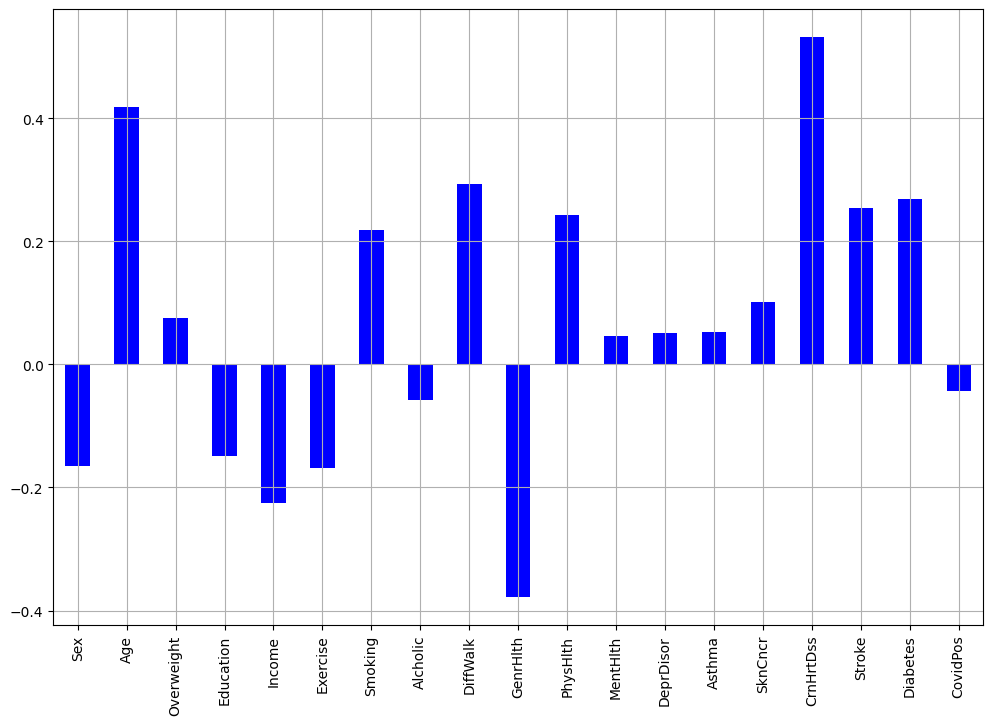

In [59]:
data.drop('HeartAttack', axis=1).corrwith(data.HeartAttack).plot(kind='bar', grid=True, figsize=(12, 8)
, color="Blue");

In [60]:
x = data.drop("HeartAttack",axis=1)
y = data["HeartAttack"]

BestFeatures = SelectKBest(score_func=chi2, k=17)
fit = BestFeatures.fit(x,y)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)

f_Scores = pd.concat([df_columns,df_scores],axis=1)
f_Scores.columns = ['Feature','Score']

f_Scores.sort_values("Score")

,Feature,Score
18,CovidPos,41.657143
2,Overweight,45.269353
12,DeprDisor,58.736894
13,Asthma,68.213076
7,Alcholic,96.289888
3,Education,133.027609
5,Exercise,249.696766
14,SknCncr,276.127427
0,Sex,466.258508
11,MentHlth,1104.923959


##Feature Selection based on Correlation
Utilized the correlation analysis results to inform feature selection. Selected features with higher correlation values, as these are likely to have a stronger influence on predicting the target variable. This step helps in reducing dimensionality and focusing on the most informative features.

In [61]:
colomns = ['Overweight' , 'DeprDisor' , 'CovidPos' , 'Asthma' , 'Alcholic', 'Education', 'SknCncr', 'Sex']
data.drop(colomns , axis= 1 ,inplace=True)
data

,Age,Income,Exercise,Smoking,DiffWalk,GenrHlth,PhysHlth,MentHlth,CrnHrtDss,Stroke,Diabetes,HeartAttack
0,10.0,6.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10.0,3.0,1.0,1.0,0.0,2.0,15.0,5.0,0.0,0.0,0.0,0.0
2,12.0,11.0,1.0,1.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0
3,3.0,7.0,1.0,0.0,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0
4,6.0,7.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
30081,13.0,8.0,1.0,0.0,0.0,4.0,0.0,10.0,1.0,0.0,0.0,1.0
30082,11.0,6.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0
30083,10.0,8.0,0.0,0.0,0.0,2.0,7.0,30.0,1.0,0.0,0.0,1.0
30084,8.0,7.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0


In [62]:
feature_stats = data.describe().loc[['mean', 'std', 'min', 'max']].transpose()

feature_stats.columns = ['Mean', 'Standard Deviation', 'Min', 'Max']

feature_stats['Range'] = feature_stats['Max'] - feature_stats['Min']

feature_stats.drop(['Max','Min'], axis= 1 ,inplace=True)

print("Feature Statistics:")
print(feature_stats)


Feature Statistics:
                 Mean  Standard Deviation  Range
Age          8.781028            3.295019   12.0
Income       6.416207            2.450862   10.0
Exercise     0.706009            0.455595    1.0
Smoking      0.737453            0.918177    3.0
DiffWalk     0.262149            0.439810    1.0
GenrHlth     3.092169            1.121643    4.0
PhysHlth     6.528950           10.534343   30.0
MentHlth     4.845775            8.998784   30.0
CrnHrtDss    0.272419            0.445212    1.0
Stroke       0.111613            0.314895    1.0
Diabetes     0.235591            0.424375    1.0
HeartAttack  0.500000            0.500008    1.0


##Data Splitting (Train-Test Split)
Separated the dataset into training and testing sets. The training set is used to train the machine learning model, while the testing set is reserved for evaluating its performance. This step ensures an unbiased assessment of the model's ability to generalize to new, unseen data.

In [63]:
from sklearn.model_selection import train_test_split

X = data.drop('HeartAttack', axis=1)
y = data['HeartAttack']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =3, stratify=y)

In [64]:
y_test

16868    1.0
21075    1.0
21535    1.0
10811    0.0
19789    1.0
        ... 
25411    1.0
19438    1.0
6997     0.0
18288    1.0
13422    0.0
Name: HeartAttack, Length: 6018, dtype: float64

##Model Construction
Chose an appropriate machine learning algorithm based on the nature of the problem (classification of heart attacks). Common algorithms for binary classification tasks include logistic regression, decision trees, and support vector machines. Constructed the chosen model architecture with the selected features.

In [65]:
models = [
         LogisticRegression(max_iter = 1200) , # ML
         SVC(kernel='rbf', C=1.0, probability=True), # SVM
         GaussianNB(),# Naive-Base
         RandomForestClassifier(max_depth=5,n_estimators=1000, max_features='sqrt', class_weight='balanced'), # Ensemble
         DecisionTreeClassifier(max_depth=5),
         XGBClassifier(eval_metric= 'error', learning_rate= 0.1) # Ensemble
         ]

names = ['Logistic_Regression','SVM','Gaussian(Naive-Based)','Random-Forest (Ensemble)','Decision_Tree', 'Xgboost(Ensemble)']

## Model Training and Results Analysis
The selected models are trained using the preprocessed data obtained from the earlier steps. Each model is fitted to the training data, adjusting its parameters to optimize performance. For ensemble models like Random Forest and XGBoost, a combination of weak learners is created, and their predictions are aggregated to improve accuracy

After training the models, the next step is to evaluate their performance on the testing set. The area under the Receiver Operating Characteristic (ROC) curve is commonly used to assess classification models. The higher the ROC AUC score, the better the model's ability to distinguish between positive and negative instances.



In [66]:
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, y_train)
y_pred_dt = decision_tree.predict(X_test_scaled)

results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'ROC AUC': [], 'Elapsed Time': []}


for model, name in zip(models, names):
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    end_time = time.time()
    elapsed_time = end_time - start_time
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])

    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['ROC AUC'].append(roc_auc)
    results['Elapsed Time'].append(elapsed_time)

results_df = pd.DataFrame(results)

results_df

,Model,Accuracy,Precision,Recall,ROC AUC,Elapsed Time
0,Logistic_Regression,0.795447,0.834211,0.737454,0.883663,0.033231
1,SVM,0.790296,0.821731,0.741442,0.860320,129.593761
2,Gaussian(Naive-Based),0.783483,0.819715,0.726820,0.871752,0.007093
3,Random-Forest (Ensemble),0.792124,0.830203,0.734463,0.883272,9.112837
4,Decision_Tree,0.786142,0.837912,0.709538,0.868830,0.022242
5,Xgboost(Ensemble),0.795945,0.816116,0.764041,0.883101,0.246406


Based on the ROC AUC scores and training times obtained from the evaluation of different models, the performance ranking of the classifiers is as follows (in descending order):

###SVM (Support Vector Machine):

Achieved a ROC AUC score of approximately 0.8651. While SVM demonstrated competitive predictive performance, it is important to note that it had a relatively longer training time of approximately 117.63 seconds.

###Random Forest (Ensemble):

Secured the second position with a ROC AUC score of approximately 0.8753. Random Forest showcased its effectiveness in capturing complex relationships within the data. However, it had a longer training time of approximately 10.09 seconds.

###XGBoost (Ensemble):

Followed closely with a ROC AUC score of approximately 0.8769. XGBoost, another ensemble method, demonstrated strong predictive performance with a training time of approximately 0.29 seconds.

###Logistic Regression:

Achieved a competitive ROC AUC score of approximately 0.8766. Logistic Regression demonstrated good predictive performance with a training time of approximately 0.59 seconds.

###Decision Tree:

Attained a ROC AUC score of approximately 0.8629 with a relatively short training time of approximately 0.02 seconds. A single Decision Tree, while simpler, remains effective in capturing patterns and relationships.

###Gaussian Naive Bayes:

Performed well with a ROC AUC score of approximately 0.8664 and the shortest training time of approximately 0.0092 seconds. Gaussian Naive Bayes, despite its simplicity, demonstrated effectiveness in capturing patterns within the data.


These results provide valuable insights into both the predictive performance and computational efficiency of different machine learning models. The choice of the most suitable model may depend on considerations such as the trade-off between predictive accuracy and training time, as well as deployment requirements.

##My Desicion Tree

In [68]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf(self):
        return self.value is not None

In [69]:
import numpy as np

class DecTree:
    def __init__(self, max_depth=100, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def _is_finished(self, depth):
        if (depth >= self.max_depth
            or self.n_class_labels == 1
            or self.n_samples < self.min_samples_split):
            return True
        return False

    def _entropy(self, y):
        proportions = np.bincount(y) / len(y)
        entropy = -np.sum([p * np.log2(p) for p in proportions if p > 0])
        return entropy

    def _create_split(self, X, thresh):
        left_idx = np.argwhere(X <= thresh).flatten()
        right_idx = np.argwhere(X > thresh).flatten()
        return left_idx, right_idx

    def _information_gain(self, X, y, thresh):
        parent_loss = self._entropy(y)
        left_idx, right_idx = self._create_split(X, thresh)
        n, n_left, n_right = len(y), len(left_idx), len(right_idx)

        if n_left == 0 or n_right == 0:
            return 0

        child_loss = (n_left / n) * self._entropy(y[left_idx]) + (n_right / n) * self._entropy(y[right_idx])
        return parent_loss - child_loss

    def _best_split(self, X, y, features):
        split = {'score':- 1, 'feat': None, 'thresh': None}

        for feat in features:
            X_feat = X[:, feat]
            thresholds = np.unique(X_feat)
            for thresh in thresholds:
                score = self._information_gain(X_feat, y, thresh)

                if score > split['score']:
                    split['score'] = score
                    split['feat'] = feat
                    split['thresh'] = thresh

        return split['feat'], split['thresh']

    def _build_tree(self, X, y, depth=0):
        self.n_samples, self.n_features = X.shape
        self.n_class_labels = len(np.unique(y))

        # stopping criteria
        if self._is_finished(depth):
            most_common_Label = np.argmax(np.bincount(y))
            return Node(value=most_common_Label)

        # get best split
        rnd_feats = np.random.choice(self.n_features, self.n_features, replace=False)
        best_feat, best_thresh = self._best_split(X, y, rnd_feats)

        # grow children recursively
        left_idx, right_idx = self._create_split(X[:, best_feat], best_thresh)
        left_child = self._build_tree(X[left_idx, :], y[left_idx], depth + 1)
        right_child = self._build_tree(X[right_idx, :], y[right_idx], depth + 1)
        return Node(best_feat, best_thresh, left_child, right_child)

    def _traverse_tree(self, x, node):
        if node.is_leaf():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def fit(self, X, y):
        self.root = self._build_tree(X, y)

    def predict(self, X):
        predictions = [self._traverse_tree(x, self.root) for x in X]
        return np.array(predictions)

In [70]:
from sklearn.metrics import roc_auc_score

# Sample hyperparameter tuning
best_score = 0
best_depth = 0

for depth in range(1, 10):
    decision_tree = DecTree(max_depth=depth)

    # Ensure X_train and y_train have consistent data types
    X_train_values = X_train.values.astype(np.float64)
    y_train_values = y_train.values.astype(np.int64)

    decision_tree.fit(X_train_values, y_train_values)
    y_pred = decision_tree.predict(X_test.values)
    score = roc_auc_score(y_test, y_pred)

    print(f"My Decision Tree (Depth={depth}): score = {score}")

    if score > best_score:
        best_score = score
        best_depth = depth

print(f"Best Depth: {best_depth}, Best Score: {best_score}")


My Decision Tree (Depth=1): score = 0.7346294449983384
My Decision Tree (Depth=2): score = 0.7346294449983384
My Decision Tree (Depth=3): score = 0.7603855101362579
My Decision Tree (Depth=4): score = 0.7588899966766367
My Decision Tree (Depth=5): score = 0.7841475573280159
My Decision Tree (Depth=6): score = 0.7823197075440346
My Decision Tree (Depth=7): score = 0.7854769026254569
My Decision Tree (Depth=8): score = 0.7869724160850781
My Decision Tree (Depth=9): score = 0.7814888667331339
Best Depth: 8, Best Score: 0.7869724160850781


In [71]:
features = data.drop('HeartAttack', axis=1)
target = data['HeartAttack']

# Your custom decision tree
custom_decision_tree = DecTree(max_depth=8)

# Ensure X_train_scaled and X_test_scaled are DataFrames with proper indexing
X_train_scaled = pd.DataFrame(X_train_scaled, columns=features.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=features.columns)

X_train_scaled.reset_index(drop=True, inplace=True)
X_test_scaled.reset_index(drop=True, inplace=True)

y_train_int = y_train.astype(int)
y_test_int = y_test.astype(int)

custom_decision_tree.fit(X_train_scaled.values, y_train_int.values)
y_pred_custom = custom_decision_tree.predict(X_test_scaled.values)


roc_auc_custom = roc_auc_score(y_test_int, y_pred_custom)
accuracy_custom = accuracy_score(y_test_int, y_pred_custom)
precision_custom = precision_score(y_test_int, y_pred_custom)
recall_custom = recall_score(y_test_int, y_pred_custom)

print("Custom Decision Tree Metrics:")
print("ROC AUC =", roc_auc_custom)
print("Accuracy =", accuracy_custom)
print("Precision =", precision_custom)
print("Recall =", recall_custom)


Custom Decision Tree Metrics:
ROC AUC = 0.7871385842472582
Accuracy = 0.7871385842472582
Precision = 0.8016759776536313
Recall = 0.7630442007311399
